In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as k
from tensorflow.keras.utils import get_custom_objects

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#tf.compat.v1.disable_eager_execution()

In [ ]:
# download the dataset
(x_train, y_train), (x_val, y_val) = mnist.load_data()

In [ ]:
# image classes or categories
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [ ]:
print("Number of Training Samples: ", len(x_train))
print("Number of Validation Samples: ", len(x_val))

Number of Training Samples:  60000
Number of Validation Samples:  10000


In [ ]:
# shape of images
print("Shape of Training images: ", x_train.shape)
print("Shape of Validation images: ", x_val.shape)

Shape of Training images:  (60000, 28, 28)
Shape of Validation images:  (10000, 28, 28)


In [ ]:
# reshape for training and testing
x_train = x_train.reshape(60000, 28, 28, 1)
x_val = x_val.reshape(10000, 28, 28, 1)

In [ ]:
# change data type
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')

In [ ]:
# normalize data into range 1-0
x_train /= 255.0
x_val /= 255.0

In [ ]:
print("Training shape: ", x_train.shape)
print("Validation shape: ", x_val.shape)

Training shape:  (60000, 28, 28, 1)
Validation shape:  (10000, 28, 28, 1)


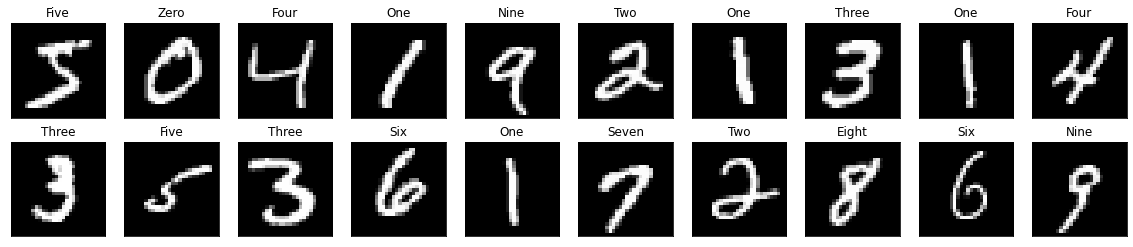

In [ ]:
# show some training images
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_train[idx].reshape(28, 28), cmap = 'gray')
  plt.title(class_names[y_train[idx]])

In [ ]:
input_shape = (28, 28, 1)
batch_size = 32
epochs = 5

In [ ]:
# create model
model = Sequential(name = 'M1-Net')

# Step 1 - Convolution Layer
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = input_shape, activation = 'relu'))
# Step 2 - MaxPolling Layer
model.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Convolution Layer
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
# Step 2 - MaxPolling Layer
model.add(MaxPooling2D(pool_size = (2, 2)))

# Step 4 - Convolution Layer
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
# Step 3 - MaxPolling Layer
model.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flatten Layer
model.add(Flatten())
model.add(Dropout(0.2))
# Step 4 - Dense Layer
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 10, activation = 'softmax'))

# summary of model
print(model.summary())

Model: "M1-Net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0    

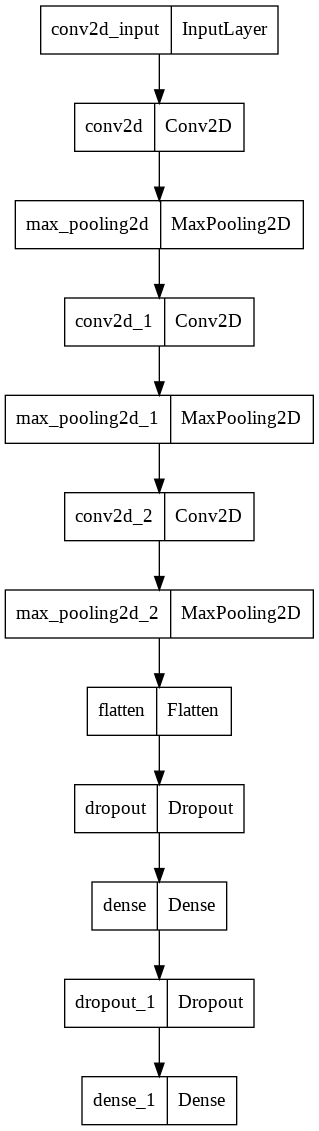

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
# compile the model
model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'sparse_categorical_crossentropy')

In [ ]:
# Fit the model on dataset
history = model.fit(x_train, y_train,
                    validation_data = (x_val, y_val),
                    batch_size = batch_size,
                    epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 26s 9ms/step - loss: 0.2554 - accuracy: 0.9212 - val_loss: 0.0780 - val_accuracy: 0.9751
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0901 - accuracy: 0.9729 - val_loss: 0.0644 - val_accuracy: 0.9800
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0691 - accuracy: 0.9797 - val_loss: 0.0640 - val_accuracy: 0.9806
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0537 - accuracy: 0.9836 - val_loss: 0.0454 - val_accuracy: 0.9870
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0450 - accuracy: 0.9866 - val_loss: 0.0535 - val_accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0393 - accuracy: 0.9878 - val_loss: 0.0451 - val_accuracy: 0.9879
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0320 - accuracy: 0.9895 - val_loss: 0.0376 - val_ac

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x_test, y_test = x_val[:100], y_val[:100]

In [ ]:
# accuracy and loss of model on test data
orig_loss, orig_accuracy = model.evaluate(x_test, y_test)
print()
print("Model Accuracy on test images: ", round(orig_accuracy, 4))
print("Model Loss on test images: ", round(orig_loss, 4))

4/4 [==============================] - 0s 21ms/step - loss: 5.8054e-04 - accuracy: 1.0000

Model Accuracy on test images:  1.0
Model Loss on test images:  0.0006


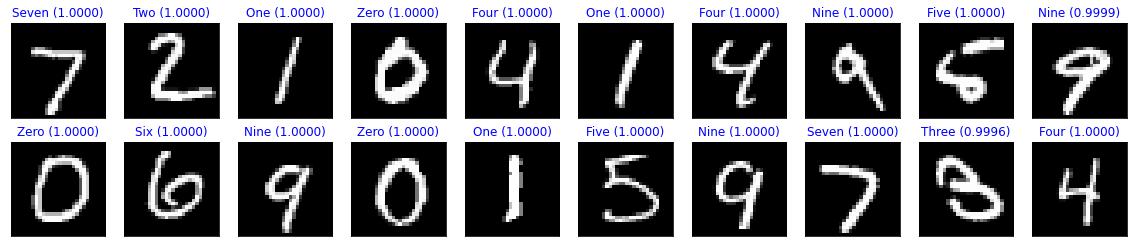

In [ ]:
# predict some testing images
predictions = model.predict(x_test)

# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_test[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(x_val[idx].reshape(28, 28), cmap = 'gray')
  plt.title('%s (%.4f)' %(class_names[np.argmax(predictions[idx])], predictions[idx].max()), color =  color)

**Gradient Based Attack**

## 1. Fast Gradient Sign Attack and Reconstruction of Adversarial Example

In [ ]:
#!pip install foolbox
import foolbox
import eagerpy as ep

In [ ]:
images = tf.cast(x_test, dtype = tf.float32)
labels = tf.cast(y_test, dtype = tf.int32)

print(images.shape)
print(labels.shape)

(1000, 28, 28, 1)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

eps = [0.3]

# create attack
attack = foolbox.attacks.FGSM()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c, epsilons = 0.2)

# adversarial purtubation
perturb = adv_img - x_test

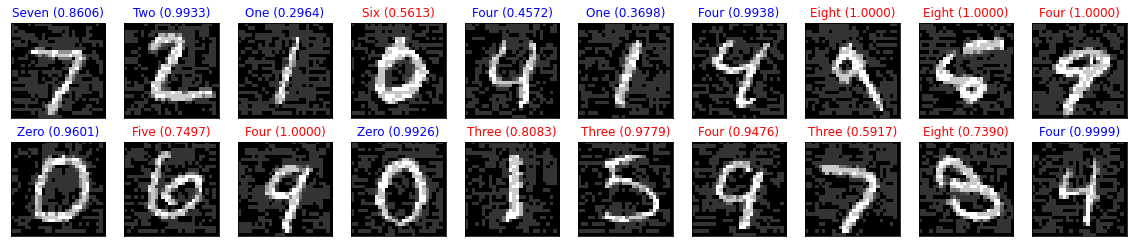

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy().reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[y_val[idx]]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title('%s (%.4f)' %(class_names[np.argmax(adv_pred[idx])], adv_pred[idx].max()), color = color)

In [ ]:
print("Average L1 Norm: ", round(tf.norm(perturb, ord = 1).numpy() / len(x_test), 4))
print("Average L2 Norm: ", round(tf.norm(perturb, ord = 2).numpy()/ len(x_test), 4))
print("Average L_inf Norm: ", round(tf.norm(perturb - x_test, ord = np.inf).numpy()/ len(x_test), 4))

Average L1 Norm:  87.5205
Average L2 Norm:  0.132
Average L_inf Norm:  0.0012


In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_test)
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 4ms/step - loss: 3.3555 - accuracy: 0.4100

Model Accuracy on test images:  0.41
Model Loss on test images:  3.3555


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove FGSM putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/autoencoder_mnist_fgsm.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

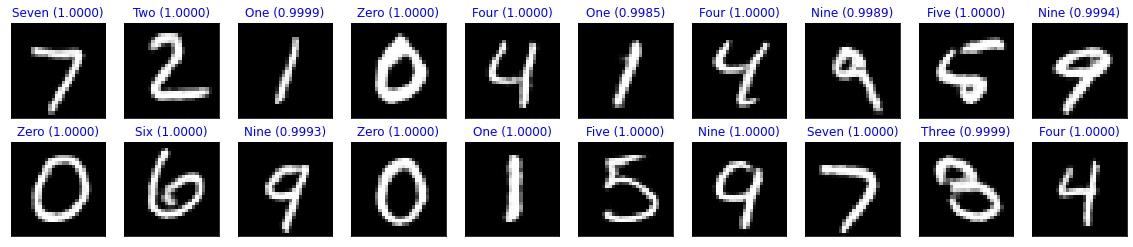

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  plt.title('%s (%.4f)' %(class_names[np.argmax(predictions[idx])], predictions[idx].max()), color =  color)
  

In [ ]:
ssim = tf.image.ssim(x_test,denise_images , max_val = 1, filter_size = 11, filter_sigma = 1.5, k1 = 0.01, k2 = 0.03)
ssim = ssim.numpy()
print("Average Structure Similarity Index between original and restored Examples:", round(ssim.mean(), 4))
print()

psnr = tf.image.psnr(x_test, denise_images, max_val = 255)
psnr = psnr.numpy()
print("Average Peak Signal-to-Noise Ratio between original and restored Examples:", psnr.mean())

Average Structure Similarity Index between original and restored Examples: 0.9126

Average Peak Signal-to-Noise Ratio between original and restored Examples: 69.95483


In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_test)
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 4ms/step - loss: 0.1617 - accuracy: 0.9670

Model Accuracy on restored images:  0.967
Model Loss on test images:  0.1617


In [ ]:
print('Sucess rate of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess rate of Defence Model:  0.9797


# 2. Basic Iterative Method (Attack) and Reconstruction of Adversarial Examples 

In [ ]:
#!pip install foolbox
import foolbox
import eagerpy as ep

In [ ]:
images = tf.cast(x_test, dtype = tf.float32)
labels = tf.cast(y_test, dtype = tf.int32)

print(images.shape)
print(labels.shape)

(100, 28, 28, 1)
(100,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

eps = [0.3]

# create attack
attack = foolbox.attacks.L2BasicIterativeAttack()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c, epsilons = 1.2)

# adversarial purtubation
perturb = adv_img - x_test

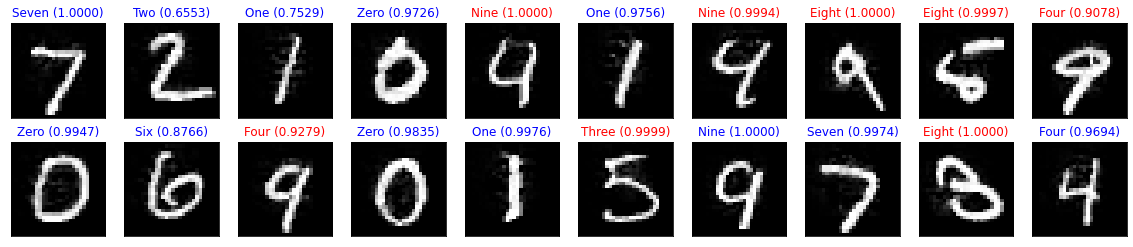

In [ ]:
adv_pred = model.predict(adv_img.numpy())

fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy().reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[y_val[idx]]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title('%s (%.4f)' %(class_names[np.argmax(adv_pred[idx])], adv_pred[idx].max()), color = color)

In [ ]:
print("Average L1 Norm: ", round(tf.norm(perturb, ord = 1).numpy() / len(x_test), 4))
print("Average L2 Norm: ", round(tf.norm(perturb, ord = 2).numpy()/ len(x_test), 4))
print("Average L_inf Norm: ", round(tf.norm(perturb - x_test, ord = np.inf).numpy()/ len(x_test), 4))

Average L1 Norm:  14.0005
Average L2 Norm:  0.0377
Average L_inf Norm:  0.0015


In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_test)
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 4ms/step - loss: 4.8770 - accuracy: 0.3110

Model Accuracy on test images:  0.311
Model Loss on test images:  4.877


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove BIM putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/autoencoder_mnist_bim.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

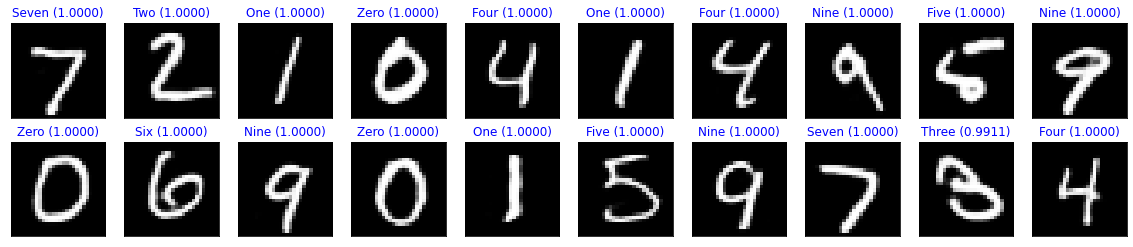

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  plt.title('%s (%.4f)' %(class_names[np.argmax(predictions[idx])], predictions[idx].max()), color =  color)
  

Text(0.5, 1.0, 'Three [0.99]')

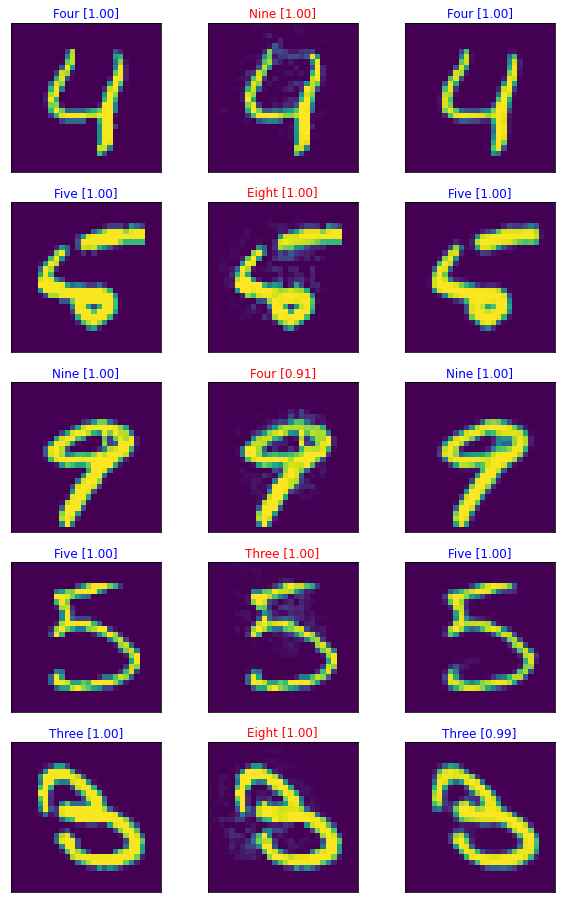

In [ ]:
fig = plt.figure(figsize = (10, 16))

ax = fig.add_subplot(5, 3, 1, xticks = [], yticks = [])
plt.imshow(x_val[4].reshape(28, 28))
plt.title('%s [%.2f]' %(class_names[np.argmax(model.predict(x_val[4].reshape(1,28,28,1)))], model.predict(x_val[4].reshape(1,28,28,1)).max()), color='b')
ax = fig.add_subplot(5, 3, 2, xticks = [], yticks = [])
plt.imshow(np.clip(adv_img[4].numpy().reshape(28, 28), 0, 1))
plt.title('%s [%.2f]' %(class_names[np.argmax(model.predict(adv_img[4].numpy().reshape(1,28,28,1)))],model.predict(adv_img[4].numpy().reshape(1,28,28,1)).max()),color='r')
ax = fig.add_subplot(5, 3, 3, xticks = [], yticks = [])
plt.imshow(np.clip(denise_images[4].reshape(28, 28), 0, 1))
plt.title('%s [%.2f]' %(class_names[np.argmax(model.predict(denise_images[4].reshape(1,28,28,1)))],model.predict(denise_images[4].reshape(1,28,28,1)).max()), color='b')

ax = fig.add_subplot(5, 3, 4, xticks = [], yticks = [])
plt.imshow(x_val[8].reshape(28, 28))
plt.title('%s [%.2f]' %(class_names[np.argmax(model.predict(x_val[8].reshape(1,28,28,1)))], model.predict(x_val[8].reshape(1,28,28,1)).max()), color='b')
ax = fig.add_subplot(5, 3, 5, xticks = [], yticks = [])
plt.imshow(np.clip(adv_img[8].numpy().reshape(28, 28), 0, 1))
plt.title('%s [%.2f]' %(class_names[np.argmax(model.predict(adv_img[8].numpy().reshape(1,28,28,1)))],model.predict(adv_img[8].numpy().reshape(1,28,28,1)).max()),color='r')
ax = fig.add_subplot(5, 3, 6, xticks = [], yticks = [])
plt.imshow(np.clip(denise_images[8].reshape(28, 28), 0, 1))
plt.title('%s [%.2f]' %(class_names[np.argmax(model.predict(denise_images[8].reshape(1,28,28,1)))],model.predict(denise_images[8].reshape(1,28,28,1)).max()), color='b')

ax = fig.add_subplot(5, 3, 7, xticks = [], yticks = [])
plt.imshow(x_val[9].reshape(28, 28))
plt.title('%s [%.2f]' %(class_names[np.argmax(model.predict(x_val[9].reshape(1,28,28,1)))], model.predict(x_val[9].reshape(1,28,28,1)).max()), color='b')
ax = fig.add_subplot(5, 3, 8, xticks = [], yticks = [])
plt.imshow(np.clip(adv_img[9].numpy().reshape(28, 28), 0, 1))
plt.title('%s [%.2f]' %(class_names[np.argmax(model.predict(adv_img[9].numpy().reshape(1,28,28,1)))],model.predict(adv_img[9].numpy().reshape(1,28,28,1)).max()),color='r')
ax = fig.add_subplot(5, 3, 9, xticks = [], yticks = [])
plt.imshow(np.clip(denise_images[9].reshape(28, 28), 0, 1))
plt.title('%s [%.2f]' %(class_names[np.argmax(model.predict(denise_images[9].reshape(1,28,28,1)))],model.predict(denise_images[9].reshape(1,28,28,1)).max()), color='b')

ax = fig.add_subplot(5, 3, 10, xticks = [], yticks = [])
plt.imshow(x_val[15].reshape(28, 28))
plt.title('%s [%.2f]' %(class_names[np.argmax(model.predict(x_val[15].reshape(1,28,28,1)))], model.predict(x_val[15].reshape(1,28,28,1)).max()), color='b')
ax = fig.add_subplot(5, 3, 11, xticks = [], yticks = [])
plt.imshow(np.clip(adv_img[15].numpy().reshape(28, 28), 0, 1))
plt.title('%s [%.2f]' %(class_names[np.argmax(model.predict(adv_img[15].numpy().reshape(1,28,28,1)))],model.predict(adv_img[15].numpy().reshape(1,28,28,1)).max()),color='r')
ax = fig.add_subplot(5, 3, 12, xticks = [], yticks = [])
plt.imshow(np.clip(denise_images[15].reshape(28, 28), 0, 1))
plt.title('%s [%.2f]' %(class_names[np.argmax(model.predict(denise_images[15].reshape(1,28,28,1)))],model.predict(denise_images[9].reshape(1,28,28,1)).max()), color='b')

ax = fig.add_subplot(5, 3, 13, xticks = [], yticks = [])
plt.imshow(x_val[18].reshape(28, 28))
plt.title('%s [%.2f]' %(class_names[np.argmax(model.predict(x_val[18].reshape(1,28,28,1)))], model.predict(x_val[18].reshape(1,28,28,1)).max()), color='b')
ax = fig.add_subplot(5, 3, 14, xticks = [], yticks = [])
plt.imshow(np.clip(adv_img[18].numpy().reshape(28, 28), 0, 1))
plt.title('%s [%.2f]' %(class_names[np.argmax(model.predict(adv_img[18].numpy().reshape(1,28,28,1)))],model.predict(adv_img[18].numpy().reshape(1,28,28,1)).max()),color='r')
ax = fig.add_subplot(5, 3, 15, xticks = [], yticks = [])
plt.imshow(np.clip(denise_images[18].reshape(28, 28), 0, 1))
plt.title('%s [%.2f]' %(class_names[np.argmax(model.predict(denise_images[18].reshape(1,28,28,1)))],model.predict(denise_images[18].reshape(1,28,28,1)).max()), color='b')


In [ ]:
ssim = tf.image.ssim(x_test,denise_images , max_val = 1, filter_size = 11, filter_sigma = 1.5, k1 = 0.01, k2 = 0.03)
ssim = ssim.numpy()
print("Average Structure Similarity Index between original and restored Examples:", round(ssim.mean(), 4))
print()

psnr = tf.image.psnr(x_test, denise_images, max_val = 255)
psnr = psnr.numpy()
print("Average Peak Signal-to-Noise Ratio between original and restored Examples:", psnr.mean())

Average Structure Similarity Index between original and restored Examples: 0.9774

Average Peak Signal-to-Noise Ratio between original and restored Examples: 76.00203


In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_test)
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 5ms/step - loss: 0.0907 - accuracy: 0.9800

Model Accuracy on restored images:  0.98
Model Loss on test images:  0.0907


In [ ]:
print('Sucess rate of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess rate of Defence Model:  0.9929


#3. Projected Gradient Descent Attack and Reconstruction of Adverasarial Examples

In [ ]:
#!pip install foolbox
import foolbox
import eagerpy as ep

In [ ]:
images = tf.cast(x_test, dtype = tf.float32)
labels = tf.cast(y_test, dtype = tf.int32)

print(images.shape)
print(labels.shape)

(1000, 28, 28, 1)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

eps = [0.3]

# create attack
attack = foolbox.attacks.PGD()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c, epsilons = 0.15)

# adversarial purtubation
perturb = adv_img - x_test

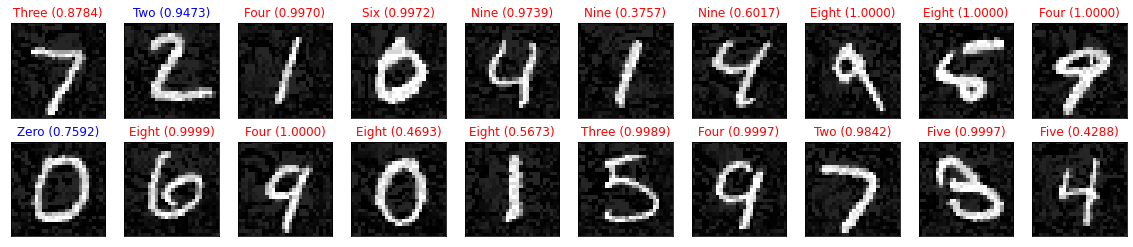

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy().reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[y_val[idx]]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title('%s (%.4f)' %(class_names[np.argmax(adv_pred[idx])], adv_pred[idx].max()), color = color)

In [ ]:
print("Average L1 Norm: ", round(tf.norm(perturb, ord = 1).numpy() / len(x_test), 4))
print("Average L2 Norm: ", round(tf.norm(perturb, ord = 2).numpy()/ len(x_test), 4))
print("Average L_inf Norm: ", round(tf.norm(perturb - x_test, ord = np.inf).numpy()/ len(x_test), 4))

Average L1 Norm:  55.4408
Average L2 Norm:  0.0799
Average L_inf Norm:  0.0011


In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_test)
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 4ms/step - loss: 7.6427 - accuracy: 0.1280

Model Accuracy on test images:  0.128
Model Loss on test images:  7.6427


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove PGD putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/autoencoder_mnist_pgd.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

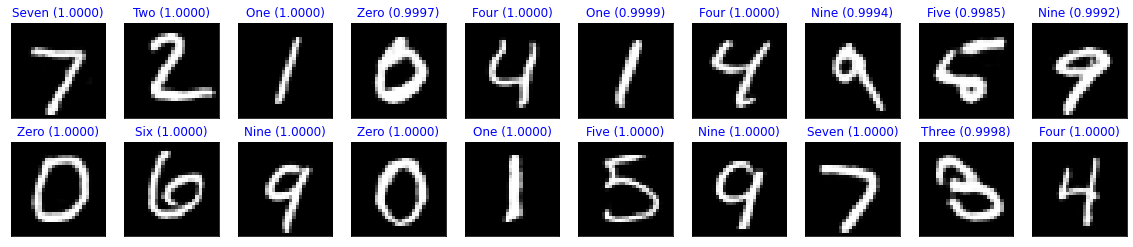

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  plt.title('%s (%.4f)' %(class_names[np.argmax(predictions[idx])], predictions[idx].max()), color =  color)
  

In [ ]:
ssim = tf.image.ssim(x_test, denise_images , max_val = 1, filter_size = 11, filter_sigma = 1.5, k1 = 0.01, k2 = 0.03)
ssim = ssim.numpy()
print("Average Structure Similarity Index between original and restored Examples:", round(ssim.mean(), 4))
print()

psnr = tf.image.psnr(x_test, denise_images, max_val = 255)
psnr = psnr.numpy()
print("Average Peak Signal-to-Noise Ratio between original and restored Examples:", psnr.mean())

Average Structure Similarity Index between original and restored Examples: 0.9811

Average Peak Signal-to-Noise Ratio between original and restored Examples: 76.65481


In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_test)
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 5ms/step - loss: 0.0786 - accuracy: 0.9810

Model Accuracy on restored images:  0.981
Model Loss on test images:  0.0786


In [ ]:
print('Sucess rate of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess rate of Defence Model:  0.9939


#4. Deep Fool Attack

In [ ]:
#!pip install foolbox
import foolbox
import eagerpy as ep

In [ ]:
images = tf.cast(x_test, dtype = tf.float32)
labels = tf.cast(y_test, dtype = tf.int32)

print(images.shape)
print(labels.shape)

(1000, 28, 28, 1)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

eps = [0.3]

# create attack
attack = foolbox.attacks.L2DeepFoolAttack()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c, epsilons = 2)

# adversarial purtubation
perturb = adv_img - x_test

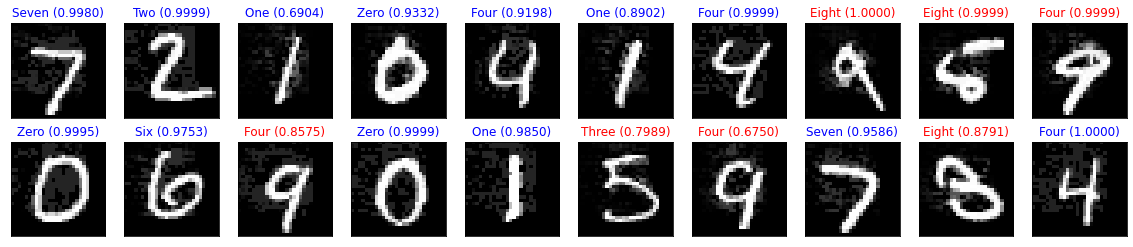

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy().reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[y_val[idx]]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title('%s (%.4f)' %(class_names[np.argmax(adv_pred[idx])], adv_pred[idx].max()), color = color)

In [ ]:
print("Average L1 Norm: ", round(tf.norm(perturb, ord = 1).numpy() / len(x_test), 4))
print("Average L2 Norm: ", round(tf.norm(perturb, ord = 2).numpy()/ len(x_test), 4))
print("Average L_inf Norm: ", round(tf.norm(perturb - x_test, ord = np.inf).numpy()/ len(x_test), 4))

Average L1 Norm:  24.8021
Average L2 Norm:  0.0618
Average L_inf Norm:  0.0015


In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_test)
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 4ms/step - loss: 1.3757 - accuracy: 0.6840

Model Accuracy on test images:  0.684
Model Loss on test images:  1.3757


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove FGSM putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/autoencoder_mnist_dfa.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

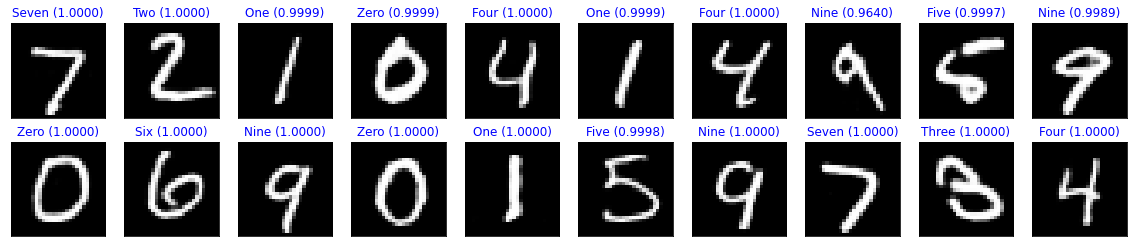

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  plt.title('%s (%.4f)' %(class_names[np.argmax(predictions[idx])], predictions[idx].max()), color =  color)
  

In [ ]:
ssim = tf.image.ssim(x_test,denise_images , max_val = 1, filter_size = 11, filter_sigma = 1.5, k1 = 0.01, k2 = 0.03)
ssim = ssim.numpy()
print("Average Structure Similarity Index between original and restored Examples:", round(ssim.mean(), 4))
print()

psnr = tf.image.psnr(x_test, denise_images, max_val = 255)
psnr = psnr.numpy()
print("Average Peak Signal-to-Noise Ratio between original and restored Examples:", psnr.mean())

Average Structure Similarity Index between original and restored Examples: 0.9788

Average Peak Signal-to-Noise Ratio between original and restored Examples: 76.45614


In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_test)
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 4ms/step - loss: 0.0810 - accuracy: 0.9780

Model Accuracy on restored images:  0.978
Model Loss on test images:  0.081


In [ ]:
print('Sucess rate of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess rate of Defence Model:  0.9909


# 5. Carlini and Wanger Attack

In [ ]:
#!pip install foolbox
import foolbox
import eagerpy as ep

In [ ]:
images = tf.cast(x_test, dtype = tf.float32)
labels = tf.cast(y_test, dtype = tf.int32)

print(images.shape)
print(labels.shape)

(1000, 28, 28, 1)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

eps = [0.3]

# create attack
attack = foolbox.attacks.L2CarliniWagnerAttack()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c, epsilons = 4)

# adversarial purtubation
perturb = adv_img - x_test

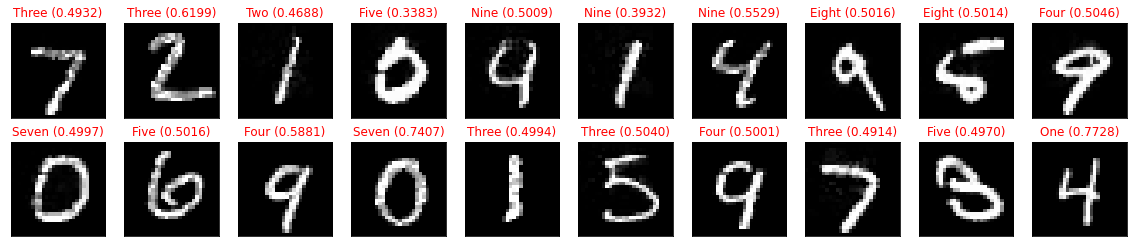

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy().reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[y_val[idx]]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title('%s (%.4f)' %(class_names[np.argmax(adv_pred[idx])], adv_pred[idx].max()), color = color)

In [ ]:
print("Average L1 Norm: ", round(tf.norm(perturb, ord = 1).numpy() / len(x_test), 4))
print("Average L2 Norm: ", round(tf.norm(perturb, ord = 2).numpy()/ len(x_test), 4))
print("Average L_inf Norm: ", round(tf.norm(perturb - x_test, ord = np.inf).numpy()/ len(x_test), 4))

Average L1 Norm:  21.6537
Average L2 Norm:  0.0885
Average L_inf Norm:  0.0018


In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_test)
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 5ms/step - loss: 0.7285 - accuracy: 0.2300

Model Accuracy on test images:  0.23
Model Loss on test images:  0.7285


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove FGSM putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/mnist_cwa.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

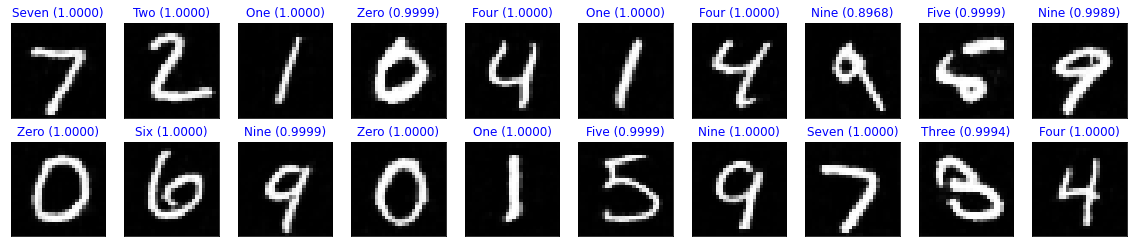

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  plt.title('%s (%.4f)' %(class_names[np.argmax(predictions[idx])], predictions[idx].max()), color =  color)
  

In [ ]:
ssim = tf.image.ssim(x_test, denise_images , max_val = 1, filter_size = 11, filter_sigma = 1.5, k1 = 0.01, k2 = 0.03)
ssim = ssim.numpy()
print("Average Structure Similarity Index between original and restored Examples:", round(ssim.mean(), 4))
print()

psnr = tf.image.psnr(x_test, denise_images, max_val = 255)
psnr = psnr.numpy()
print("Average Peak Signal-to-Noise Ratio between original and restored Examples:", psnr.mean())

Average Structure Similarity Index between original and restored Examples: 0.9442

Average Peak Signal-to-Noise Ratio between original and restored Examples: 75.52581


In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_test)
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 4ms/step - loss: 0.0462 - accuracy: 0.9880

Model Accuracy on restored images:  0.988
Model Loss on test images:  0.0462


In [ ]:
print('Sucess rate of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess rate of Defence Model:  1.001


# 6. Spatial attack and Reconstruction of Adverasarial Examples

In [ ]:
#!pip install foolbox
import foolbox
import eagerpy as ep

In [ ]:
images = tf.cast(x_test, dtype = tf.float32)
labels = tf.cast(y_test, dtype = tf.int32)

print(images.shape)
print(labels.shape)

(1000, 28, 28, 1)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

eps = [0.3]

# create attack
attack = foolbox.attacks.SpatialAttack()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c)

# adversarial purtubation
perturb = adv_img - x_test

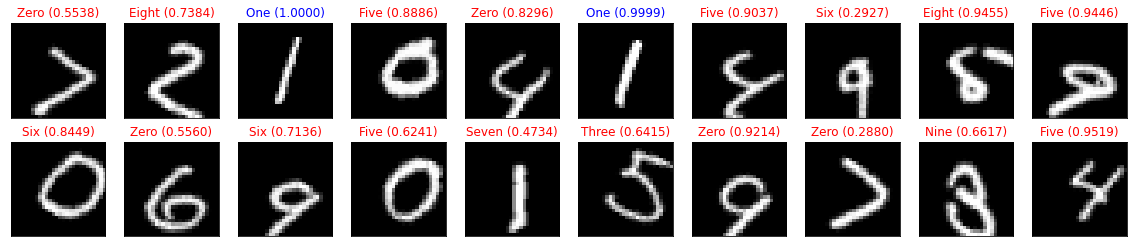

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy().reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[y_val[idx]]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title('%s (%.4f)' %(class_names[np.argmax(adv_pred[idx])], adv_pred[idx].max()), color = color)

In [ ]:
print("Average L1 Norm: ", round(tf.norm(perturb, ord = 1).numpy() / len(x_test), 4))
print("Average L2 Norm: ", round(tf.norm(perturb, ord = 2).numpy()/ len(x_test), 4))
print("Average L_inf Norm: ", round(tf.norm(perturb - x_test, ord = np.inf).numpy()/ len(x_test), 4))

Average L1 Norm:  123.7736
Average L2 Norm:  0.3057
Average L_inf Norm:  0.002


In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_test)
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 4ms/step - loss: 2.7141 - accuracy: 0.0420

Model Accuracy on test images:  0.042
Model Loss on test images:  2.7141


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove FGSM putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/autoencoder_mnist_spa.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

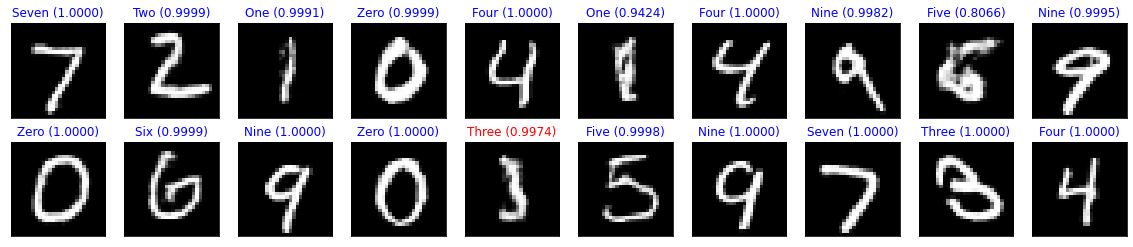

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  plt.title('%s (%.4f)' %(class_names[np.argmax(predictions[idx])], predictions[idx].max()), color =  color)
  

In [ ]:
ssim = tf.image.ssim(x_test,denise_images , max_val = 1, filter_size = 11, filter_sigma = 1.5, k1 = 0.01, k2 = 0.03)
ssim = ssim.numpy()
print("Average Structure Similarity Index between original and restored Examples:", round(ssim.mean(), 4))
print()

psnr = tf.image.psnr(x_test, denise_images, max_val = 255)
psnr = psnr.numpy()
print("Average Peak Signal-to-Noise Ratio between original and restored Examples:", psnr.mean())

Average Structure Similarity Index between original and restored Examples: 0.8366

Average Peak Signal-to-Noise Ratio between original and restored Examples: 71.48472


In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_test)
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 5ms/step - loss: 0.2256 - accuracy: 0.9560

Model Accuracy on restored images:  0.956
Model Loss on test images:  0.2256


In [ ]:
print('Sucess rate of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess rate of Defence Model:  0.9686
